<a href="https://colab.research.google.com/github/Jeromy0515/machine-learning/blob/main/k-nearest-neighbor/machine_learning1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 총 159개의 데이터 중 도미 데이터 35개 사용
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

  

In [ ]:
# 빙어 데이터 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

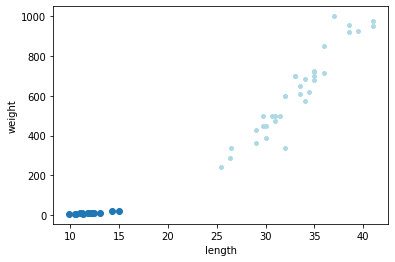

In [ ]:
# pyplot scatter 
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, s=15, c='lightblue') # scatter 함수 : x, y값을 분석해 marker를 표시함
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축 라벨 
plt.ylabel('weight') # y축 라벨 
plt.show() 

In [ ]:
# k-Nearest Neighbor (k-최근접 이웃): 새로운 데이터를 예측할 떄 가장 가까운 직선 거리에 있는 k개에 어떤 데이터가 있는지를 살핌
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

# 길이, 무게로 구성된 2차원 리스트
# zip 함수는 리스트를 인자로 받고, 각 인자에 접근할 수 있는 접근자를 반환한다.
fish_data = [[l, w] for l, w in zip(length, weight)] 
print(fish_data)
# 2차원 리스트: 첫 번째 생선의 길이와 무게가 하나의 리스트, 도미와 빙어를 합한 총 49개의 리스트를 구성하는 전체 리스트

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 정답 데이터: 도미와 빙어
# 0 : 빙어, 1 : 도미
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()       # 모델 생성 n_neighbors default value = 5
kn.fit(fish_data, fish_target)    # 모델 학습
kn.score(fish_data, fish_target)  # 모델 정확도 : 정확도의 기준은 데이터 셋이 많은 데이터를 참으로 지정

1.0

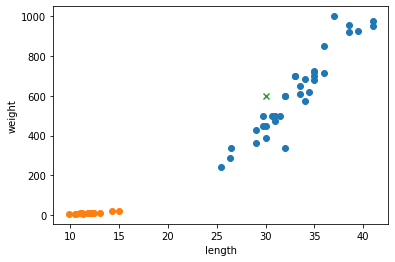

도미


In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='x') # x = 30, y = 600 좌표에 x 형태의 marker 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# predict 함수 : 파라미터로 받은 값을 학습된 데이터 샘플에 대해 예측한 후 Class Label을 반환
# 입력으로 주어진 데이터 안의 객체 Class, Label 혹은 Class Label 이라고 부름 ex) 0 : 빙어, 1 : 도미
print('빙어' if kn.predict([[30, 600]])[0] == 0 else '도미') # x = 30, y = 600 인 데이터에 대해 K-NN 알고리즘으로 예측한 Class Label을 반환

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143